Maximum pixel value: 32767.0


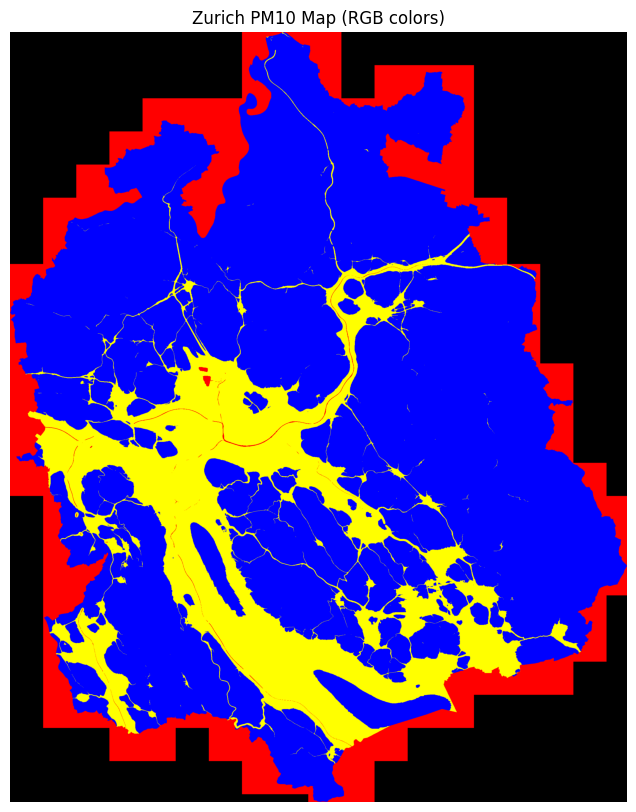

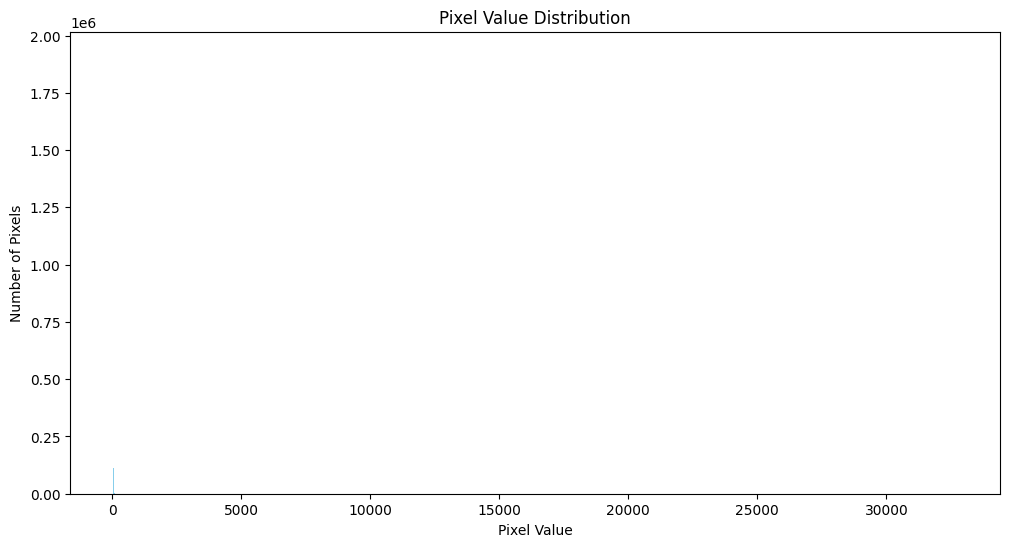

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# --- LOAD THE TIFF FILE ---
input_file = "../geoserver_data/data/russ.tif"

with rasterio.open(input_file) as src:
    data = src.read(1).astype(float)  # convert to float to avoid overflow

# --- CREATE AN RGB IMAGE ---
# Initialize an empty array with 3 channels (height x width x 3)
result = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)

# Apply the color rules
result[data < 1] = [0,0,0]
result[(data >= 1) & (data <= 50)] = [0, 0, 255]               # Blue
result[(data >= 50) & (data <= 150)] = [255, 255, 0]  # Yellow
result[data > 150] = [255, 0, 0]                  # Red

max_value = data.max()
print(f"Maximum pixel value: {max_value}")
# --- DISPLAY USING MATPLOTLIB ---
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.title("Zurich PM10 Map (RGB colors)")
plt.axis("off")
plt.show()

values, counts = np.unique(data, return_counts=True)

# --- PLOT THE PIXEL VALUE DISTRIBUTION ---
plt.figure(figsize=(12, 6))
plt.bar(values, counts, color='skyblue')
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")
plt.show()